<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/One_Way_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Python notebook demonstrates the computation of One-Way ANOVA.
The example is from Montgomery Intro to SQC (7th ed chap 4). Paper strength by hardwood concentration. Ref.
https://www.pythonfordatascience.org/anova-python/
https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/paper%20strength%20one-way%20ANOVA.csv', sep=',', na_values=".")
data

,Obs,Conc,Strength
0,1,5,7
1,2,5,8
2,3,5,15
3,4,5,11
4,5,5,9
5,6,5,10
6,1,10,12
7,2,10,17
8,3,10,13
9,4,10,18


In [3]:
# filter out 5% hardwood concentration and validate it
Conc5=data[data['Conc']==5]['Strength']
Conc5

0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64

In [4]:
# another way for filtering
conc5=data['Strength'][data['Conc'] == 5]
conc5

0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64

In [5]:
#x5_bar
statistics.mean(conc5)

10

In [6]:
np.mean(conc5)

10.0

In [7]:
statistics.stdev(conc5)

2.8284271247461903

In [8]:
np.std(conc5, ddof=1)

2.8284271247461903

In [9]:
# filter out all other concentration
Conc10=data[data['Conc']==10]['Strength']
Conc15=data[data['Conc']==15]['Strength']
Conc20=data[data['Conc']==20]['Strength']

# run one way anova using scipy f_onway function

In [10]:
# run one way anova using scipy f_onway function
# make sure Conc is capital on the first letter; varaible name is case sensitive!
stat, p=f_oneway(Conc5, Conc10, Conc15, Conc20 )
print('stat=%.3f, p=%.3f' %(stat,p))

stat=19.605, p=0.000


The F test from one-way ANOVA is used to test
**H0: tau5%=tau10%=tau15%=mtau20%=0 **vs
H1: at least one tau <>0
Since the pvalue is very small, we would reject H0 and conclude that
there is a difference in paper strenght influenced by hardwood concentration

# Linear Model for One Factor Analysis

In [11]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Obs       24 non-null     int64
 1   Conc      24 non-null     int64
 2   Strength  24 non-null     int64
dtypes: int64(3)
memory usage: 704.0 bytes


In [12]:
# To generate anova table using the ols model from statsmodel

model = ols('Strength ~ C(Conc)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Conc),382.791667,3.0,19.605207,0.000004
Residual,130.166667,20.0,NaN,NaN


In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           3.59e-06
Time:                        13:42:23   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.0000      1.041      9.602

In [14]:
# the prediction is actually Yi_ bar, i=1,2, ..., a (number of treatments) for all observations
# for example conc=5% has 6 obs at the same values, etc
strength_predict=model.predict()
strength_predict

array([10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 15.66666667, 15.66666667, 15.66666667, 15.66666667,
       15.66666667, 15.66666667, 17.        , 17.        , 17.        ,
       17.        , 17.        , 17.        , 21.16666667, 21.16666667,
       21.16666667, 21.16666667, 21.16666667, 21.16666667])

In [15]:
# Compute ANOVA table with MSE
# This is a more simplified version of the OLS summary table
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
C(Conc),382.791667,3.0,127.597222,19.605207,0.000004
Residual,130.166667,20.0,6.508333,NaN,NaN


MSE=mean_sq of Residual, in this case MSE=6.5

In [16]:
# R2 value
model.rsquared

0.7462431971407685

In [17]:
# Adjusted R2 value
model.rsquared_adj

0.7081796767118838

In [18]:
residuals=model.resid
residuals

0    -3.000000e+00
1    -2.000000e+00
2     5.000000e+00
3     1.000000e+00
4    -1.000000e+00
5    -5.329071e-15
6    -3.666667e+00
7     1.333333e+00
8    -2.666667e+00
9     2.333333e+00
10    3.333333e+00
11   -6.666667e-01
12   -3.000000e+00
13    1.000000e+00
14    2.000000e+00
15    7.105427e-15
16   -1.000000e+00
17    1.000000e+00
18   -2.166667e+00
19    3.833333e+00
20    8.333333e-01
21    1.833333e+00
22   -3.166667e+00
23   -1.166667e+00
dtype: float64

# Model Validation and Residual Analysis

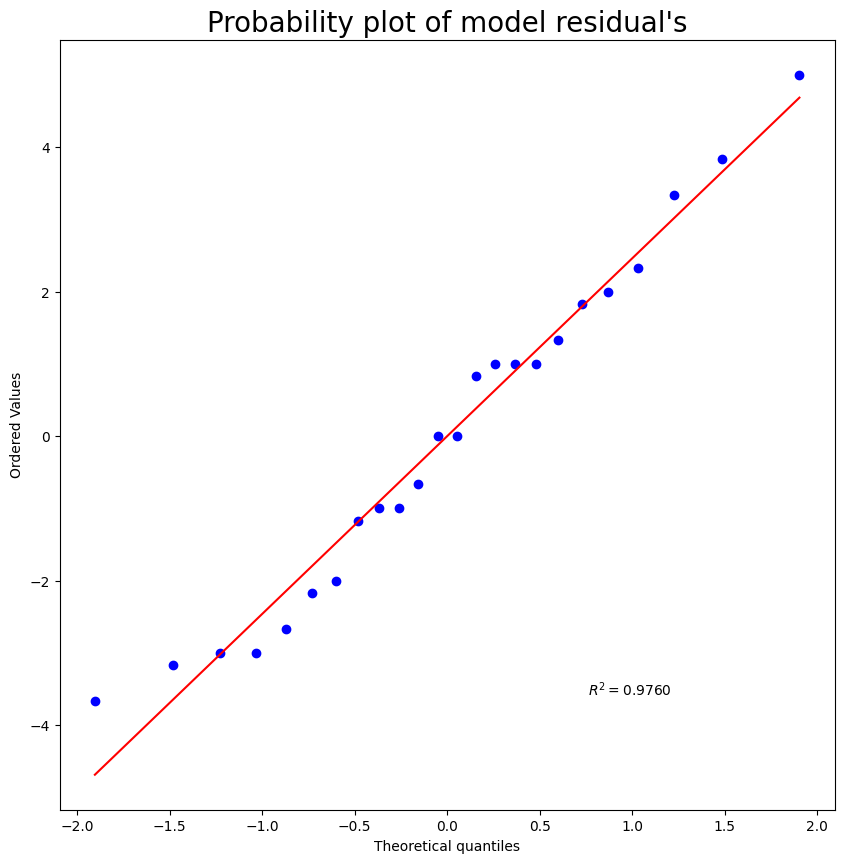

In [19]:
# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [20]:
# Homogeneity of Variance check
# Levene() method

stats.levene(df['Strength'][df['Conc'] == 5],
             df['Strength'][df['Conc'] == 10],
             df['Strength'][df['Conc'] == 15],
             df['Strength'][df['Conc'] == 20])

LeveneResult(statistic=0.5988455988455988, pvalue=0.6231941028644978)

The p value of the Levene is very large. We don't have evidence to conclude that the variances from different hardwood concentration are different

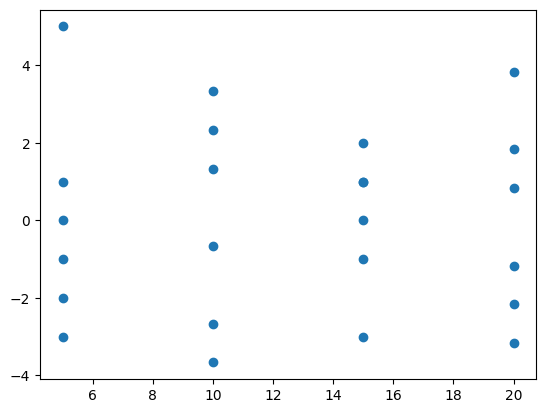

In [21]:
# Plot fo residuals vs factor levels (e.g different treatments)
import matplotlib.pyplot as plt

treatment=data['Conc']

plt.scatter(treatment, residuals)

plt.show()

To visualized constant variance assumption, observe the length of each bar of similar length. Apply both scatter plots above and below.

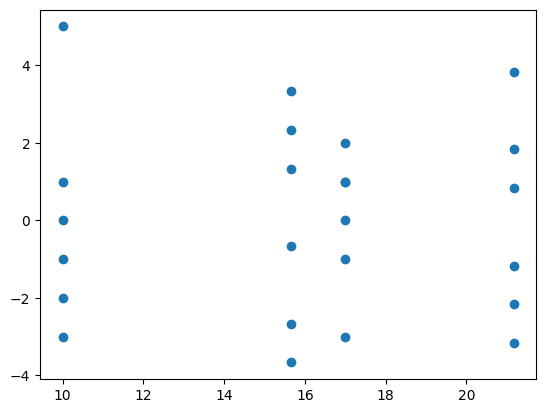

In [22]:
# Plot fo residuals vs prediction at factor levels (e.g different treatments)
# Usually run with the previous block

plt.scatter(strength_predict, residuals)

plt.show()

In [23]:
# Standard Error se computation
# se= sqrt(MSE/n) where n is number of obs for each treatment; n=6 in this case
# use the se value as a visual guide in the above plot
# ref. figure 4.12 of Montgomery Intro to SQC 7ed
n=len(Conc5)
se= np.sqrt(model.mse_resid/n)
se


1.041499986664533

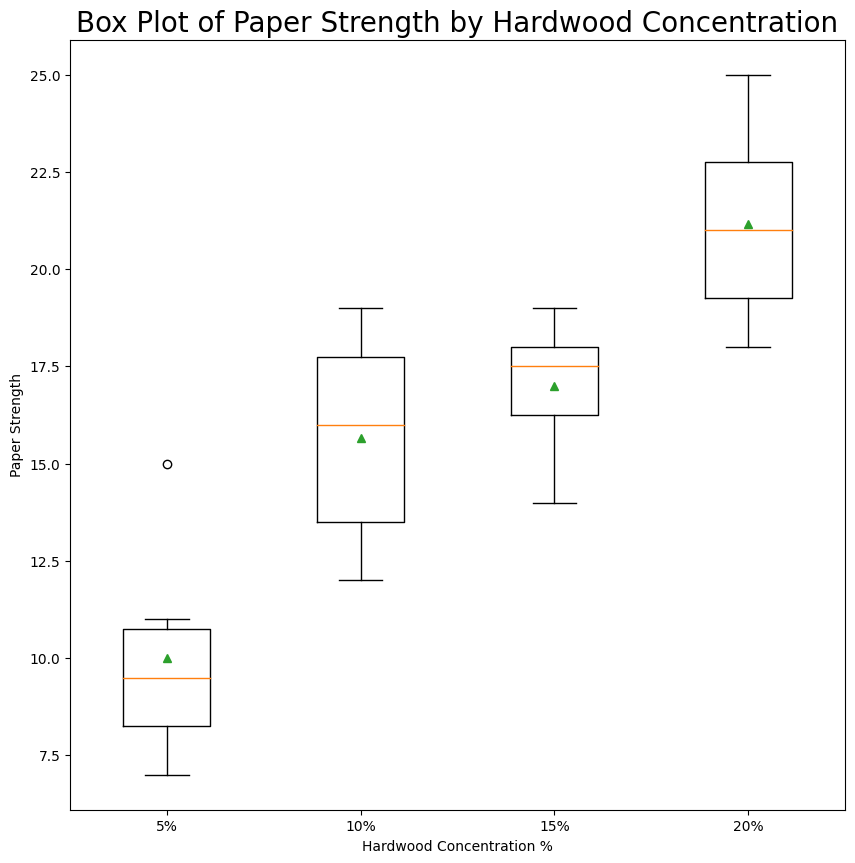

In [24]:
# Box plots by factor levels'

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Paper Strength by Hardwood Concentration", fontsize= 20)
ax.set

#data2 = [df['Strength'][df['Conc'] == 5],
#             df['Strength'][df['Conc'] == 10],
#             df['Strength'][df['Conc'] == 15],
#             df['Strength'][df['Conc'] == 20]]

data2=[Conc5, Conc10, Conc15, Conc20]

ax.boxplot(data2,
           labels= ['5%', '10%', '15%', '20%'],
           showmeans= True)

plt.xlabel("Hardwood Concentration %")
plt.ylabel("Paper Strength")

plt.show()

In [25]:
# the data structure of data2
print(data2)

[0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64, 6     12
7     17
8     13
9     18
10    19
11    15
Name: Strength, dtype: int64, 12    14
13    18
14    19
15    17
16    16
17    18
Name: Strength, dtype: int64, 18    19
19    25
20    22
21    23
22    18
23    20
Name: Strength, dtype: int64]


# Multiple Comparison Tests

Tukey LSD (Least Significant Difference) q table (or studentized range q)
https://real-statistics.com/statistics-tables/studentized-range-q-table/

In summary, the Tukey LSD method is used to perform pairwise comparisons of group means in an ANOVA when you have multiple groups and have found a significant overall difference. It helps identify which specific pairs of groups have significantly different means, allowing you to make more detailed and precise conclusions about the differences among the groups.




User
List Tukey distribution table
ChatGPT
I'm sorry for any confusion, but there isn't a specific "Tukey distribution table" like you would find for other statistical distributions (e.g., normal distribution or t-distribution). Instead, the Tukey LSD (Least Significant Difference) method uses critical values from a distribution called the Studentized Range Distribution (also known as the q-distribution).

To perform Tukey's LSD test, you need to consult a table of critical values from the Studentized Range Distribution or use statistical software that can calculate these values for you based on the desired level of significance (e.g., 0.05 for a 95% confidence level).

The critical values depend on the degrees of freedom associated with the numerator and denominator of the F-statistic from the ANOVA, as well as the number of groups or treatments you are comparing. Therefore, you will need to know the degrees of freedom and the number of groups to find the appropriate critical values for your specific analysis.

You can often find critical value tables for the Studentized Range Distribution in statistics textbooks or online resources specifically dedicated to statistics and ANOVA. These tables provide values of q (the critical value) for different degrees of freedom and significance levels, which you can then use to conduct Tukey's LSD test.







In [26]:
# Multiple comparison test
# ref https://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html
#Tukey Honestly Significat Difference (HSD)
comp = mc.MultiComparison(df['Strength'], df['Conc'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
5,10,5.6667,0.0051,1.5441,9.7892,True
5,15,7.0,0.0007,2.8774,11.1226,True
5,20,11.1667,0.0,7.0441,15.2892,True
10,15,1.3333,0.8022,-2.7892,5.4559,False
10,20,5.5,0.0066,1.3774,9.6226,True
15,20,4.1667,0.047,0.0441,8.2892,True


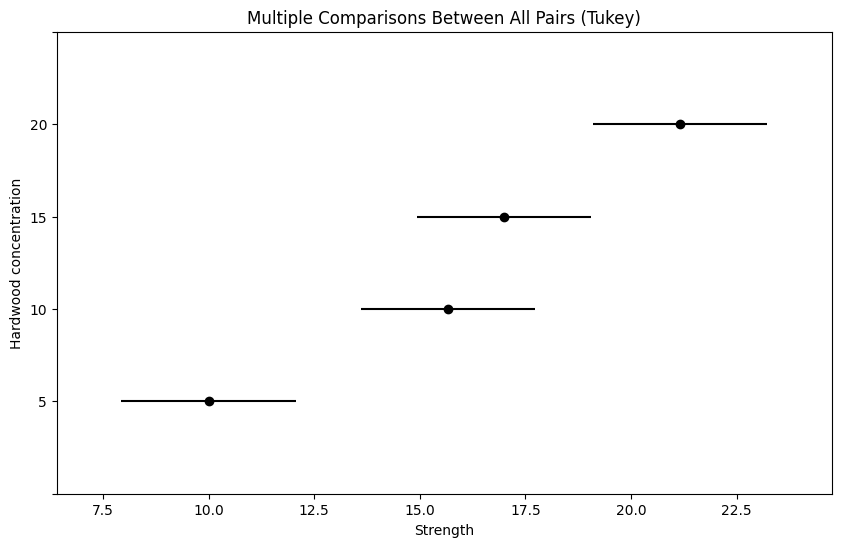

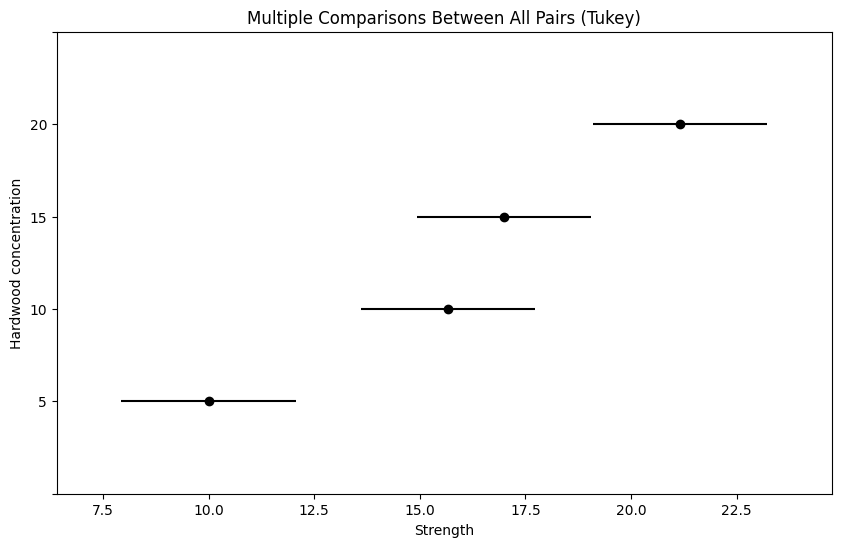

In [27]:
#visualize the Tukey test
post_hoc_res.plot_simultaneous(ylabel= "Hardwood concentration", xlabel= "Strength")